In [1]:
%pwd

'/home/kyudan/AnomLLM/notebook'

In [2]:
%cd /home/kyudan/AnomLLM/data/synthetic

/home/kyudan/AnomLLM/data/synthetic


In [3]:
!pwd

/home/kyudan/AnomLLM/data/synthetic


In [4]:
import os
data_type = os.listdir('/home/kyudan/AnomLLM/data/synthetic')
data_type

['trend',
 'flat-trend',
 'anomaly_distribution.png',
 'noisy-trend',
 'range',
 'freq',
 'component_series_400.pkl',
 'point',
 'noisy-point',
 'component_dataset.csv',
 'noisy-freq',
 'all_data_metadata.csv',
 'all_data_with_series.pkl']

In [10]:
import os
import pandas as pd
import numpy as np
import pickle

# 기본 디렉토리 경로
base_dir = '/home/kyudan/AnomLLM/data/synthetic'

result_dfs = []

data_type_folders = [f.name for f in os.scandir(base_dir) if f.is_dir()]

for data_type in data_type_folders:
    pkl_path = os.path.join(base_dir, data_type, 'eval', 'data.pkl')
    
    
            
    with open(pkl_path, 'rb') as f:
        data_dict = pickle.load(f)


    series_data = data_dict['series']
    anom_data = data_dict['anom']
    
       
    meta_records = []
    
    for i in range(len(series_data)):
        series = np.array(series_data[i]).flatten() if hasattr(series_data[i], '__iter__') else [series_data[i]]
        series_length = len(series)

        anom = np.array(anom_data[i]).flatten() if hasattr(anom_data[i], '__iter__') else [anom_data[i]]
        has_anomaly = 1 if np.any(anom) else 0

        meta_records.append({
            'data_type': data_type,
            'series_id': i,
            'series_length': series_length,
            'has_anomaly': has_anomaly
        })
        
    
    if meta_records:
        meta_df = pd.DataFrame(meta_records)
        result_dfs.append(meta_df)

if result_dfs:
    all_data = pd.concat(result_dfs, ignore_index=True)
    valid_data = all_data[all_data['has_anomaly'] != -1]
    if not valid_data.empty:
        anomaly_ratio = valid_data.groupby('data_type')['has_anomaly'].mean()
   
    output_path = os.path.join(base_dir, 'all_data_metadata.csv')
    all_data.to_csv(output_path, index=False)
else:
    print("\n데이터가 성공적으로 로드되지 않았습니다.")

In [11]:
import os
import pandas as pd
import numpy as np
import pickle

base_dir = '/home/kyudan/AnomLLM/data/synthetic'

result_dfs = []

data_type_folders = [f.name for f in os.scandir(base_dir) if f.is_dir()]

for data_type in data_type_folders:
    pkl_path = os.path.join(base_dir, data_type, 'eval', 'data.pkl')
    
    
    with open(pkl_path, 'rb') as f:
        data_dict = pickle.load(f)
            
           
    series_data = data_dict['series']
    anom_data = data_dict['anom']
    
    records = []
    
    for i in range(len(series_data)):
        
        series = np.array(series_data[i]).flatten()
        series_length = len(series)
        
        anom = np.array(anom_data[i]).flatten()
        has_anomaly = 1 if np.any(anom) else 0
        
        record = {
            'data_type': data_type,
            'series_id': i,
            'series_length': series_length,
            'has_anomaly': has_anomaly
        }
        
        record['series_values'] = series.tolist()
        
        record['anomaly_mask'] = anom.tolist()
        
        records.append(record)
        
    
    if records:
        df = pd.DataFrame(records)
        result_dfs.append(df)



all_data = pd.concat(result_dfs, ignore_index=True)

sample_df = all_data.head().copy()
sample_df['series_values'] = sample_df['series_values'].apply(lambda x: str(x[:5]) + '...')
sample_df['anomaly_mask'] = sample_df['anomaly_mask'].apply(lambda x: str(x[:5]) + '...')

anomaly_ratio = all_data.groupby('data_type')['has_anomaly'].mean()

output_path = os.path.join(base_dir, 'all_data_with_series.pkl')
all_data.to_pickle(output_path)

meta_data = all_data.drop(['series_values', 'anomaly_mask'], axis=1)
meta_output_path = os.path.join(base_dir, 'all_data_metadata.csv')
meta_data.to_csv(meta_output_path, index=False)


In [12]:
%pwd

'/home/kyudan/AnomLLM/data/synthetic'

In [13]:
import pandas as pd

# 기본 사용법
df = pd.read_csv('all_data_metadata.csv')

In [14]:
df

,data_type,series_id,series_length,has_anomaly
0,trend,0,1000,0
1,trend,1,1000,0
2,trend,2,1000,0
3,trend,3,1000,0
4,trend,4,1000,0
...,...,...,...,...
3195,noisy-freq,395,1000,0
3196,noisy-freq,396,1000,0
3197,noisy-freq,397,1000,1
3198,noisy-freq,398,1000,1


In [15]:
filtered_df = df[df['series_id'].between(0, 99)]
filtered_df

,data_type,series_id,series_length,has_anomaly
0,trend,0,1000,0
1,trend,1,1000,0
2,trend,2,1000,0
3,trend,3,1000,0
4,trend,4,1000,0
...,...,...,...,...
2895,noisy-freq,95,1000,1
2896,noisy-freq,96,1000,1
2897,noisy-freq,97,1000,1
2898,noisy-freq,98,1000,1


In [16]:
filtered_df['data_type'].unique()

array(['trend', 'flat-trend', 'noisy-trend', 'range', 'freq', 'point',
       'noisy-point', 'noisy-freq'], dtype=object)

In [ ]:
keep_data_types = ['trend', 'range', 'freq', 'point']

final_df = filtered_df[filtered_df['data_type'].isin(keep_data_types)]

In [18]:
final_df

,data_type,series_id,series_length,has_anomaly
0,trend,0,1000,0
1,trend,1,1000,0
2,trend,2,1000,0
3,trend,3,1000,0
4,trend,4,1000,0
...,...,...,...,...
2095,point,95,1000,0
2096,point,96,1000,1
2097,point,97,1000,1
2098,point,98,1000,1


In [ ]:
final_df['trend'] = 0
final_df['seasonal'] = 0
final_df['noise'] = 0

In [21]:
# data_type에 따라 값 설정
# 1. trend 데이터타입: trend=1, seasonal=1
final_df.loc[final_df['data_type'] == 'trend', ['trend', 'seasonal']] = 1

# 2. range 데이터타입: noise=1
final_df.loc[final_df['data_type'] == 'range', 'noise'] = 1

# 3. freq 데이터타입: seasonal=1
final_df.loc[final_df['data_type'] == 'freq', 'seasonal'] = 1

# 4. point 데이터타입: seasonal=1
final_df.loc[final_df['data_type'] == 'point', 'seasonal'] = 1

# 5. point 데이터타입에서 has_anomaly=1인 경우: noise=1
final_df.loc[(final_df['data_type'] == 'point') & (final_df['has_anomaly'] == 1), 'noise'] = 1


In [22]:
final_df

,data_type,series_id,series_length,has_anomaly,trend,seasonal,noise
0,trend,0,1000,0,1,1,0
1,trend,1,1000,0,1,1,0
2,trend,2,1000,0,1,1,0
3,trend,3,1000,0,1,1,0
4,trend,4,1000,0,1,1,0
...,...,...,...,...,...,...,...
2095,point,95,1000,0,0,1,0
2096,point,96,1000,1,0,1,1
2097,point,97,1000,1,0,1,1
2098,point,98,1000,1,0,1,1


In [23]:
final_df.drop('series_length', axis=1, inplace=True)

/tmp/ipykernel_79808/1823508127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.drop('series_length', axis=1, inplace=True)


In [24]:
final_df

,data_type,series_id,has_anomaly,trend,seasonal,noise
0,trend,0,0,1,1,0
1,trend,1,0,1,1,0
2,trend,2,0,1,1,0
3,trend,3,0,1,1,0
4,trend,4,0,1,1,0
...,...,...,...,...,...,...
2095,point,95,0,0,1,0
2096,point,96,1,0,1,1
2097,point,97,1,0,1,1
2098,point,98,1,0,1,1


In [25]:
import pandas as pd
import pickle

with open('/home/kyudan/AnomLLM/data/synthetic/all_data_with_series.pkl', 'rb') as f:
    all_data_with_series = pd.read_pickle(f)

series_data = all_data_with_series[all_data_with_series['data_type'].isin(keep_data_types)]
series_data = series_data[series_data['series_id'].between(0, 99)]

series_columns = series_data[['data_type', 'series_id', 'series_values', 'anomaly_mask']]

final_df_with_series = pd.merge(
    final_df, 
    series_columns,
    on=['data_type', 'series_id'],
    how='left'
)
final_df_with_series.to_pickle('/home/kyudan/AnomLLM/data/synthetic/component_series_400.pkl')

In [26]:
final_df.to_csv("component_dataset.csv")


<Figure size 1200x600 with 0 Axes>

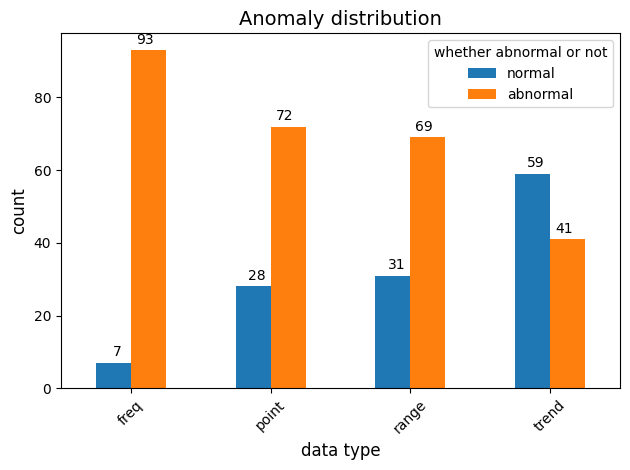


각 데이터 타입별 이상치 분포:
           normal  abnormal
data_type                  
freq            7        93
point          28        72
range          31        69
trend          59        41

각 데이터 타입별 이상치 비율(%):
           normal  abnormal
data_type                  
freq          7.0      93.0
point        28.0      72.0
range        31.0      69.0
trend        59.0      41.0


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 가정: final_df는 이미 로드되어 있음

# data_type과 has_anomaly에 따른 개수 계산
anomaly_counts = pd.crosstab(final_df['data_type'], final_df['has_anomaly'])

# 열 이름 변경 (명확성을 위해)
anomaly_counts.columns = ['normal', 'abnormal']

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 막대 그래프 그리기
anomaly_counts.plot(kind='bar', stacked=False)

# 그래프 제목 및 레이블 설정
plt.title('Anomaly distribution', fontsize=14)
plt.xlabel('data type', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='whether abnormal or not')

# 각 막대 위에 값 표시
for i, data_type in enumerate(anomaly_counts.index):
    for j, col in enumerate(anomaly_counts.columns):
        plt.text(i+j*0.2-0.1, anomaly_counts.loc[data_type, col] + 1, 
                 str(anomaly_counts.loc[data_type, col]), 
                 ha='center', va='bottom')

# 레이아웃 조정
plt.tight_layout()

# 그래프 저장 (선택 사항)
plt.savefig('/home/kyudan/AnomLLM/data/synthetic/anomaly_distribution.png', dpi=300)

# 그래프 표시
plt.show()

# 숫자로도 출력 (확인용)
print("\n각 데이터 타입별 이상치 분포:")
print(anomaly_counts)

# 백분율로 계산
anomaly_percentage = anomaly_counts.div(anomaly_counts.sum(axis=1), axis=0) * 100
print("\n각 데이터 타입별 이상치 비율(%):")
print(anomaly_percentage.round(1))

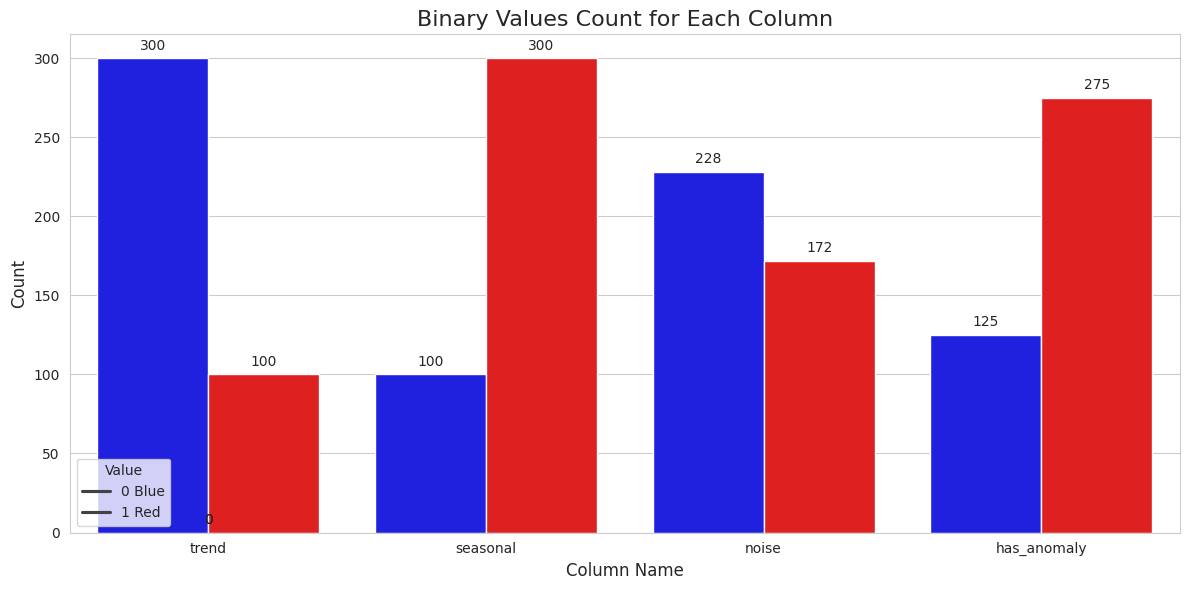

In [28]:
# 각 열의 0과 1 개수 계산
counts = pd.DataFrame({
    'Column': [],
    'Value': [],
    'Count': []
})

for column in ['trend', 'seasonal', 'noise', 'has_anomaly']:
    value_counts = final_df[column].value_counts().reset_index()
    value_counts.columns = ['Value', 'Count']
    value_counts['Column'] = column
    counts = pd.concat([counts, value_counts], ignore_index=True)

# 시각화를 위한 설정
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# 각 열별로 0과 1의 개수를 보여주는 그룹화된 막대 그래프 생성
bar_plot = sns.barplot(x='Column', y='Count', hue='Value', data=counts, palette=['blue', 'red'])

# 그래프 꾸미기
plt.title('Binary Values Count for Each Column', fontsize=16)
plt.xlabel('Column Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Value', labels=['0 Blue', '1 Red'])

# 막대 위에 값 표시
for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height()), 'd'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')

plt.tight_layout()
plt.show()

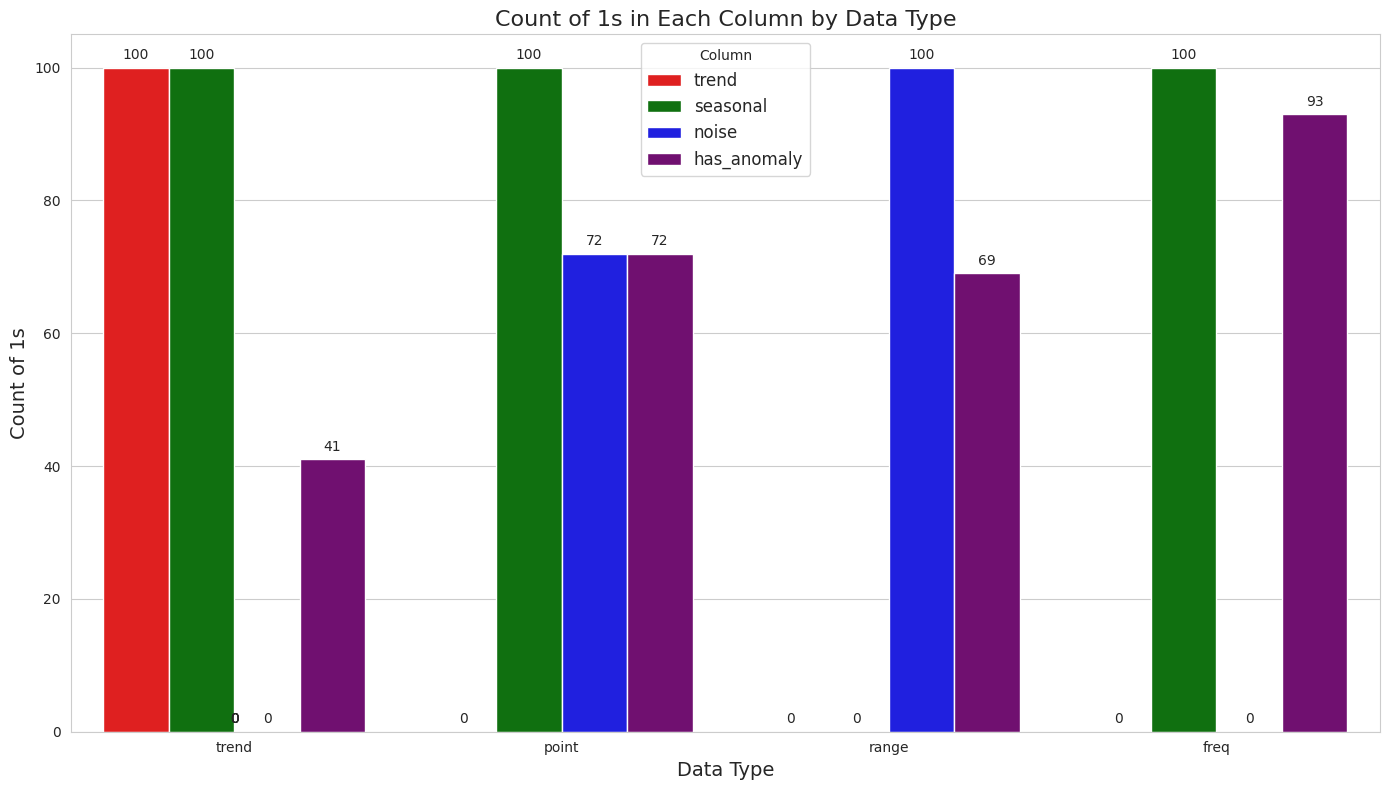

In [29]:
# 'data_type' 열의 각 유형에 따라 각 열의 1 개수 계산
data_types = ['trend', 'point', 'range', 'freq']
binary_columns = ['trend', 'seasonal', 'noise', 'has_anomaly']

# 결과를 저장할 데이터프레임 생성
result_df = pd.DataFrame({
    'data_type': [],
    'column': [],
    'count_of_ones': []
})

# 각 data_type에 대해 1의 개수 계산
for data_type in data_types:
    # 해당 data_type에 해당하는 행만 필터링
    filtered_df = final_df[final_df['data_type'] == data_type]
    
    # 각 이진 열에 대해 1의 개수 계산
    for col in binary_columns:
        count_ones = filtered_df[col].sum()  # 1의 개수 합산
        
        # 결과 저장
        new_row = {'data_type': data_type, 'column': col, 'count_of_ones': count_ones}
        result_df = pd.concat([result_df, pd.DataFrame([new_row])], ignore_index=True)

# 시각화를 위한 설정
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# 색상 지정: 빨강, 초록, 파랑, 보라
custom_palette = ['red', 'green', 'blue', 'purple']

# 그룹화된 막대 그래프 생성
bar_plot = sns.barplot(x='data_type', y='count_of_ones', hue='column', data=result_df, palette=custom_palette)

# 그래프 꾸미기
plt.title('Count of 1s in Each Column by Data Type', fontsize=16)
plt.xlabel('Data Type', fontsize=14)
plt.ylabel('Count of 1s', fontsize=14)
plt.legend(title='Column', fontsize=12)

# 막대 위에 값 표시
for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height()), 'd'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()

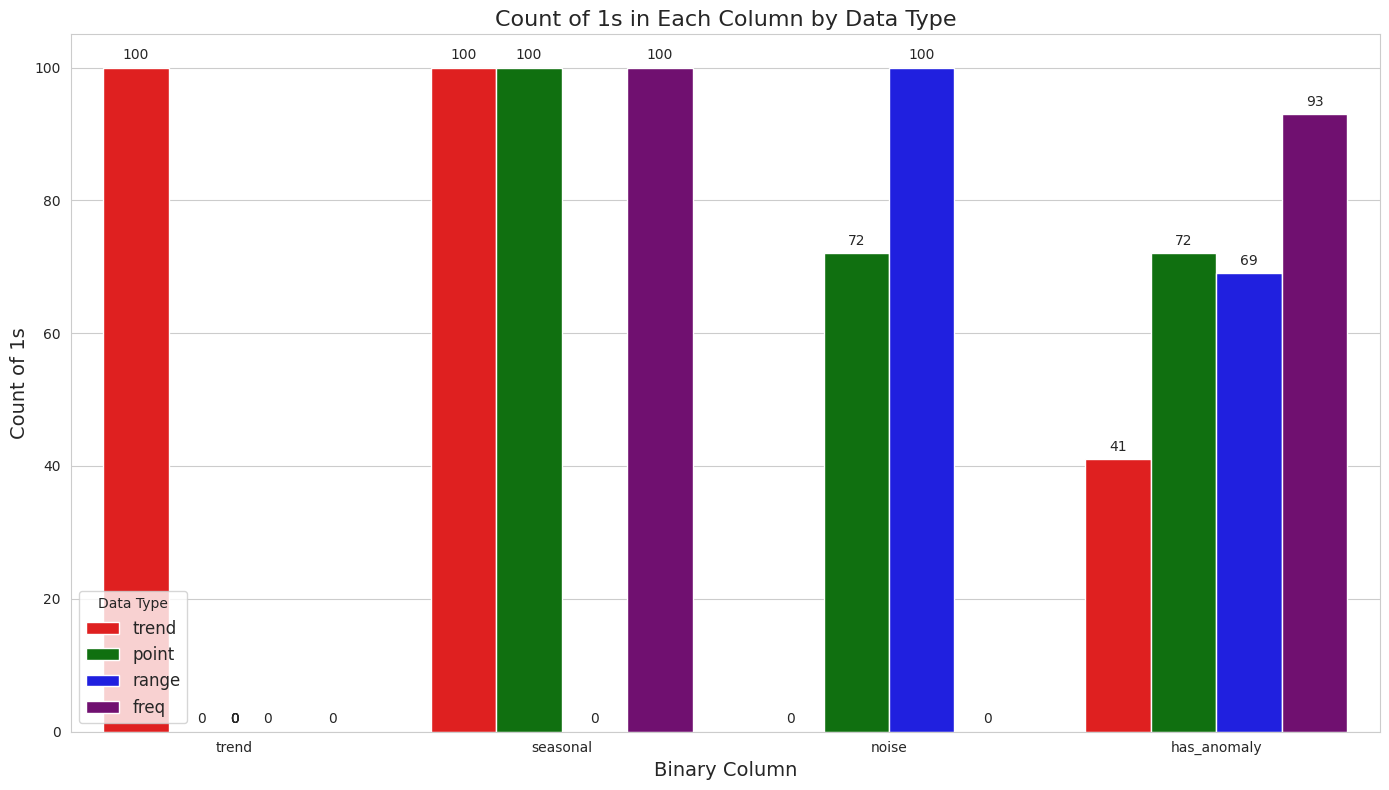

In [30]:
# 'data_type'에 따라 각 이진 열의 1 개수 계산
data_types = ['trend', 'point', 'range', 'freq']
binary_columns = ['trend', 'seasonal', 'noise', 'has_anomaly']

# 결과를 저장할 데이터프레임 생성
result_df = pd.DataFrame({
    'binary_column': [],
    'data_type': [],
    'count_of_ones': []
})

# 각 이진 열에 대해 data_type별 1의 개수 계산
for col in binary_columns:
    # 각 data_type에 대해 1의 개수 계산
    for data_type in data_types:
        # 해당 data_type에 해당하는 행만 필터링
        filtered_df = final_df[final_df['data_type'] == data_type]
        
        # 1의 개수 계산
        count_ones = filtered_df[col].sum()
        
        # 결과 저장
        new_row = {'binary_column': col, 'data_type': data_type, 'count_of_ones': count_ones}
        result_df = pd.concat([result_df, pd.DataFrame([new_row])], ignore_index=True)

# 시각화를 위한 설정
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# 색상 지정: 빨강, 초록, 파랑, 보라 (data_type에 대응)
custom_palette = ['red', 'green', 'blue', 'purple']

# 그룹화된 막대 그래프 생성 - x축은 binary_column, 색상은 data_type
bar_plot = sns.barplot(x='binary_column', y='count_of_ones', hue='data_type', 
                       data=result_df, palette=custom_palette)

# 그래프 꾸미기
plt.title('Count of 1s in Each Column by Data Type', fontsize=16)
plt.xlabel('Binary Column', fontsize=14)
plt.ylabel('Count of 1s', fontsize=14)
plt.legend(title='Data Type', fontsize=12)

# 막대 위에 값 표시
for p in bar_plot.patches:
    bar_plot.annotate(format(int(p.get_height()), 'd'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 9),
                     textcoords = 'offset points')

plt.tight_layout()
plt.show()